In [95]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot, download_plotlyjs
init_notebook_mode(connected=True)


In [42]:
data = pd.read_csv("BlackFriday.csv")

In [43]:
data.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [44]:
data.info()
# lots of missing alues in Product Cats 2,3

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [72]:
data.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [45]:
l = data.City_Category.unique()
d = [(l[i], data[data.City_Category == l[i]].Gender.count()) for i in range(len(l))]

In [46]:
l2 = data.Product_Category_3.unique()
d2 = [(l2[i], data[data.Product_Category_3 == l2[i]].Gender.count()) for i in range(len(l2))]

In [47]:
d2

[(nan, 0),
 (14.0, 18121),
 (17.0, 16449),
 (5.0, 16380),
 (4.0, 1840),
 (16.0, 32148),
 (15.0, 27611),
 (8.0, 12384),
 (9.0, 11414),
 (13.0, 5385),
 (6.0, 4818),
 (12.0, 9094),
 (3.0, 600),
 (18.0, 4563),
 (11.0, 1773),
 (10.0, 1698)]

In [48]:
p2 = data.Product_Category_2.mean()
p3 = data.Product_Category_3.mean()

In [49]:
data.Product_Category_2.fillna(value=p2, inplace=True)

In [50]:
data.Product_Category_3.fillna(value=p3, inplace=True)

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            537577 non-null float64
Product_Category_3            537577 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


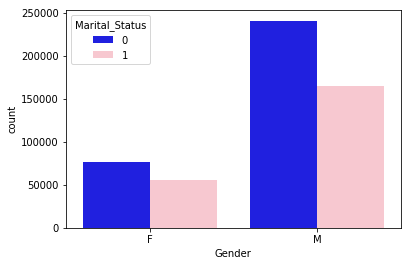

In [70]:
sns.countplot(data['Gender'], hue=data['Marital_Status'], palette=["blue", "pink"])

In [77]:
# explore different occupations:
l_job = data.Occupation.unique()
d_job = [(l_job[i], data[data.Occupation == l_job[i]].Gender.count()) for i in range(len(l_job))]

In [84]:
max(d_job, key=lambda x:x[1])

(4, 70862)

In [86]:
'foo bar bar bar'.replace('bar', 'XXX', 2).find('bar')

12

In [89]:
# code for percentage of nulls
temp_df = data.isnull().sum().reset_index()
temp_df['Percentage of Null Values'] = temp_df[0]/len(data)*100
temp_df.columns = ['Column Name', 'Number of Null Values','Percentage of Null Values']
temp_df

,Column Name,Number of Null Values,Percentage of Null Values
0,User_ID,0,0.0
1,Product_ID,0,0.0
2,Gender,0,0.0
3,Age,0,0.0
4,Occupation,0,0.0
5,City_Category,0,0.0
6,Stay_In_Current_City_Years,0,0.0
7,Marital_Status,0,0.0
8,Product_Category_1,0,0.0
9,Product_Category_2,0,0.0


In [90]:
# product 3 actually had ~70% missing vals, so drop the column
data.drop(labels='Product_Category_3', axis=1, inplace=True)

In [98]:
age = data['Age'].value_counts().reset_index()
age.columns = ['Age Group', 'Count']
age.iplot(kind='bar', x='Age Group', y='Count', title='Number of people belongs to different age group',
         xTitle='Age Group', yTitle='Quantity', color='deepskyblue')